In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_theme()
import pandas as pd 
from pathlib import Path 
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
import matplotlib


In [3]:
analysis_dir = Path(Path.home(), "Documents/xray/score_bench/data/3ca7")
job_names = ["47_1", "48_2", "49_4", "50_8", "51_16"]

score_dfs = list() 
for job_name in job_names: 
    score_dir = Path(analysis_dir, job_name)
    
    score_file = Path(score_dir, "best_1000_3ca7_0.csv")
    score_df = pd.read_csv(score_file)
    score_dfs.append(score_df)
    print(np.mean(score_df["r_free"]), np.min(score_df["r_free"]))


0.3266389893637997 0.3075993511608834
0.3155314825814844 0.3040474944949783
0.31947978312929903 0.3021740263059885
0.3271336257550381 0.3116705049400194
0.3524069576361442 0.3116705049400194


In [4]:
font_size = 20 
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 10}

axes = {'labelsize': font_size}

xtick = {'labelsize': font_size}
ytick = {'labelsize': font_size}
legend = {'fontsize': font_size,
          'markerscale': 2,
          'title_fontsize': font_size,
          'loc': "upper left"}

matplotlib.rc('font', **font)
matplotlib.rc('axes', **axes)
matplotlib.rc('xtick', **xtick)
matplotlib.rc('ytick', **ytick)
matplotlib.rc('legend', **legend)

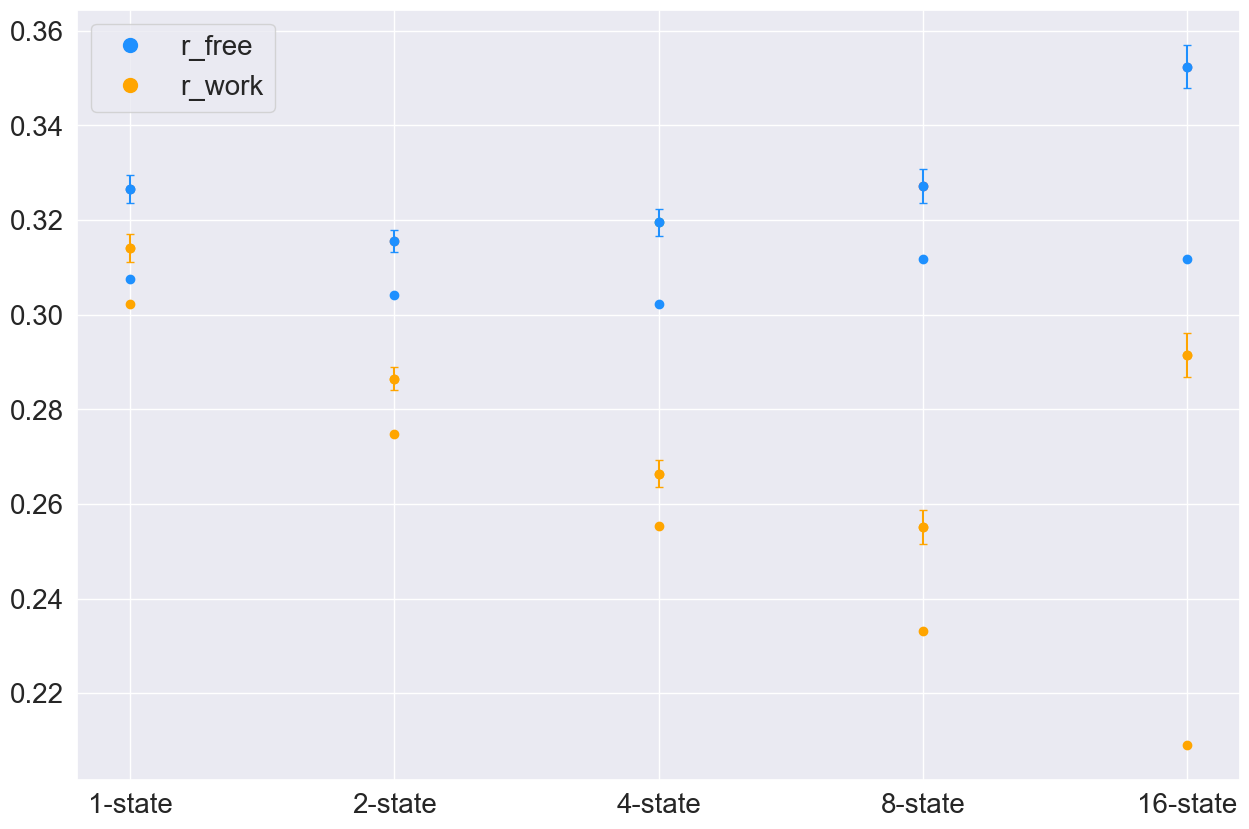

In [6]:

colors = list() 
colors.append(mcolors.CSS4_COLORS["dodgerblue"])
colors.append(mcolors.CSS4_COLORS["orange"])
colors.append(mcolors.CSS4_COLORS["orangered"])

fig = plt.figure(figsize=(15,10))

for i in range(len(score_dfs)): 
    n_state = 2**i
    score_df = score_dfs[i]
    x = i

    y = np.mean(score_df["r_free"])
    std = np.std(score_df["r_free"])
    
    min_val = np.min(score_df["r_free"])

    plt.scatter(x, np.mean(score_df["r_free"]))
    plt.errorbar(x, np.mean(score_df["r_free"]), np.std(score_df["r_free"]), linestyle='None', marker='o', capsize=3, c=colors[0])
    plt.scatter(x, np.min(score_df["r_free"]), c=colors[0])
    
    plt.scatter(x, np.mean(score_df["r_work"]), c=colors[1])
    plt.errorbar(x, np.mean(score_df["r_work"]), np.std(score_df["r_free"]), linestyle='None', marker='o', capsize=3, c=colors[1])
    plt.scatter(x, np.min(score_df["r_work"]), c=colors[1])
    
my_xticks = ["1-state",'2-state','4-state','8-state', '16-state']
plt.xticks(list(range(len(score_dfs))), my_xticks)

custom_legend = list() 
custom_legend.append(Line2D([], [], marker='.', markersize=10, color=colors[0], linestyle='None'))
custom_legend.append(Line2D([], [], marker='.', markersize=10, color=colors[1], linestyle='None'))
plt.legend(custom_legend, ['r_free', 'r_work'])

fig_file = Path(Path.home(), "Desktop/3ca7_n_state_score_distributions.png")
plt.savefig(fig_file)
# plt.show()
